<a href="https://colab.research.google.com/github/sriharshitha06/Machine-Learning/blob/main/week_3_assignment_numpy_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Computing Foundations & NumPy Internals

**Course:** Applied Data Engineering with Python  
**Focus:** Memory Model, Vectorization, ndarray Internals


## 1. Why Pure Python is Slow for Numerical Computing
- Python object overhead
- Dynamic typing cost
- Loop overhead
- Memory access patterns


In [ ]:
import time
n = 10_000_000
a = list(range(n))
b = list(range(n))
start = time.time()
c = [a[i] + b[i] for i in range(n)]
end = time.time()
print('Python loop time:', end - start)

Python loop time: 2.0391643047332764


## 2. NumPy Vectorization Benchmark
Vectorized operations execute in optimized C code.

In [ ]:
import numpy as np
a = np.arange(n)
b = np.arange(n)
start = time.time()
c = a + b
end = time.time()
print('NumPy vectorized time:', end - start)

NumPy vectorized time: 0.2891695499420166


## 3. ndarray Internals

In [ ]:
arr = np.arange(12).reshape(3,4)
print('Shape:', arr.shape)
print('Dtype:', arr.dtype)
print('Strides:', arr.strides)
print('Itemsize:', arr.itemsize)
print('Total bytes:', arr.nbytes)

Shape: (3, 4)
Dtype: int64
Strides: (32, 8)
Itemsize: 8
Total bytes: 96


In [ ]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Lab 1: Stride Exploration
1. Create a 4x4 array
2. Transpose it
3. Compare strides before and after transpose

In [ ]:
A = np.arange(16).reshape(4,4)
B = A.T
print('Original strides:', A.strides)
print('Transposed strides:', B.strides)

Original strides: (32, 8)
Transposed strides: (8, 32)


## 4. Dtypes & Memory Efficiency

In [ ]:
arr_float64 = np.zeros((1000,1000), dtype=np.float64)
arr_float32 = np.zeros((1000,1000), dtype=np.float32)
print('float64 size (MB):', arr_float64.nbytes / 1e6)
print('float32 size (MB):', arr_float32.nbytes / 1e6)

float64 size (MB): 8.0
float32 size (MB): 4.0


## 5. Views vs Copies

In [ ]:
a = np.arange(10)
b = a[2:8]
b[0] = 999
print('Original array:', a)
print('Is view?', b.base is a)

Original array: [  0   1 999   3   4   5   6   7   8   9]
Is view? True


# Mini Project
1. Compare Python loops vs NumPy vectorization
2. Benchmark multiple sizes
3. Plot performance results
4. Provide engineering explanation


1. Compare the performance of Python loops and NumPy vectorization

In [ ]:
def python_add(list1, list2):
    result_list = []
    for i in range(len(list1)):
        result_list.append(list1[i] + list2[i])
    return result_list
python_add([1,2,3],[4,5,6])

[5, 7, 9]

In [ ]:
import numpy as np
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
result_array = np.add(array1, array2)
print('Input Array 1:', array1)
print('Input Array 2:', array2)
print('Result of numpy_add:', result_array)

Input Array 1: [1 2 3]
Input Array 2: [4 5 6]
Result of numpy_add: [5 7 9]


2. Benchmark the performance of Python list addition and NumPy array

In [ ]:
sizes = [10**i for i in range(2, 8)]  # From 10^2 to 10^7 (100 to 10,000,000)
print('Defined sizes for benchmarking:', sizes)

Defined sizes for benchmarking: [100, 1000, 10000, 100000, 1000000, 10000000]


In [ ]:
import time
import numpy as np

python_times = []
numpy_times = []

for size in sizes:
    # Python list addition benchmark
    list1 = list(range(size))
    list2 = list(range(size))
    start_time = time.time()
    python_add(list1, list2)
    end_time = time.time()
    python_times.append(end_time - start_time)

    # NumPy array addition benchmark
    array1 = np.arange(size)
    array2 = np.arange(size)
    start_time = time.time()
    array1 + array2
    end_time = time.time()
    numpy_times.append(end_time - start_time)

print('Python execution times:', python_times)
print('NumPy execution times:', numpy_times)

Python execution times: [1.0013580322265625e-05, 8.130073547363281e-05, 0.0010194778442382812, 0.01630401611328125, 0.17874789237976074, 2.4967751502990723]
NumPy execution times: [6.461143493652344e-05, 1.9073486328125e-05, 8.988380432128906e-05, 0.0005817413330078125, 0.01329803466796875, 0.10262012481689453]


3. Plot performance results



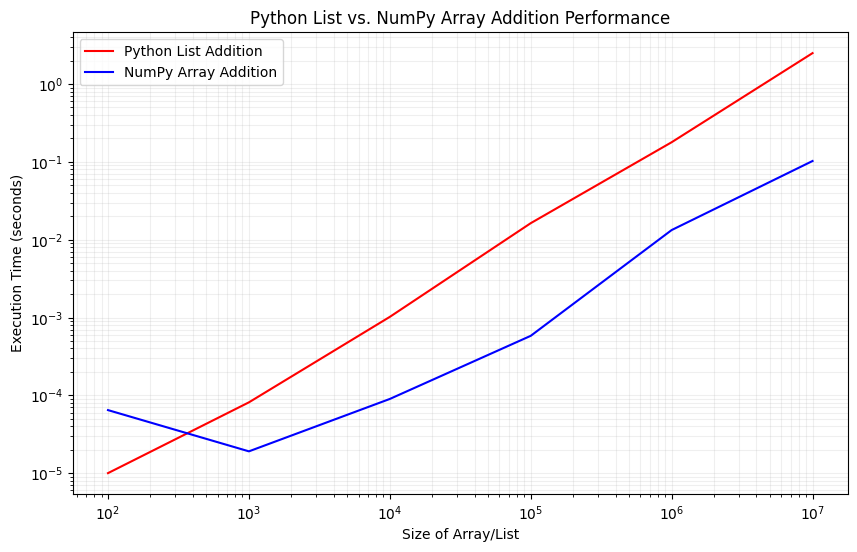

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sizes, python_times, label='Python List Addition', color='red')
plt.plot(sizes, numpy_times, label='NumPy Array Addition', color='blue')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Size of Array/List')
plt.ylabel('Execution Time (seconds)')
plt.title('Python List vs. NumPy Array Addition Performance')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

## Engineering Explanation for Performance Differences

The plot clearly illustrates that NumPy array addition significantly outperforms Python list addition, especially as the size of the data increases. Here's an engineering explanation for this observed difference:

1.  **Vectorization (C/Fortran Back-end)**:
    *   **NumPy:** NumPy operations are *vectorized*, meaning that operations like `array1 + array2` are implemented in highly optimized, pre-compiled C or Fortran code. This allows for elemental operations to be performed on entire arrays at once, without the overhead of Python's interpreter loop.
    *   **Python Lists:** When you use a Python `for` loop (`python_add` function), the interpreter has to execute each iteration of the loop individually. Each operation `list1[i] + list2[i]` involves Python object lookups, type checks, and function calls, which are much slower than the low-level operations in NumPy's C-compiled code.

2.  **Memory Layout and Data Types (Homogeneous vs. Heterogeneous)**:
    *   **NumPy:** NumPy arrays store elements of a *single, homogeneous data type* (e.g., `int64` or `float32`) in a contiguous block of memory. This allows for efficient memory access (cache locality) and simplifies computations, as all elements are known to be of the same size and type.
    *   **Python Lists:** Python lists are arrays of pointers to Python objects. Each element in a Python list can be of a different type, and each integer (or any other data type) is a full-fledged Python object stored elsewhere in memory. This indirection and scattered memory allocation lead to cache misses and significant overhead during operations.

3.  **Reduced Overhead:**
    *   **NumPy:** The fixed type and contiguous memory block of NumPy arrays mean there's minimal overhead for memory management and type checking during arithmetic operations. The operations are performed directly on the raw numerical data.
    *   **Python Lists:** Every operation on a Python object (like an integer in a list) involves object creation, destruction, and reference counting, all of which add considerable overhead, especially in loops.

In summary, NumPy leverages compiled C code for its core operations, optimizes memory layout for numerical data, and avoids the per-element overhead of Python objects and the interpreter loop. These factors combined lead to the dramatically superior performance observed for NumPy array addition compared to native Python list addition, making NumPy essential for high-performance numerical computing in Python.